# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*

In [15]:
import numpy as np
from datascience import *
import math as m

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Classification - Examination through ScatterPlots

In [16]:
link = "https://raw.githubusercontent.com/humdskyline/data/main/IRIS.csv"
iris =  Table.read_table(link)
iris

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


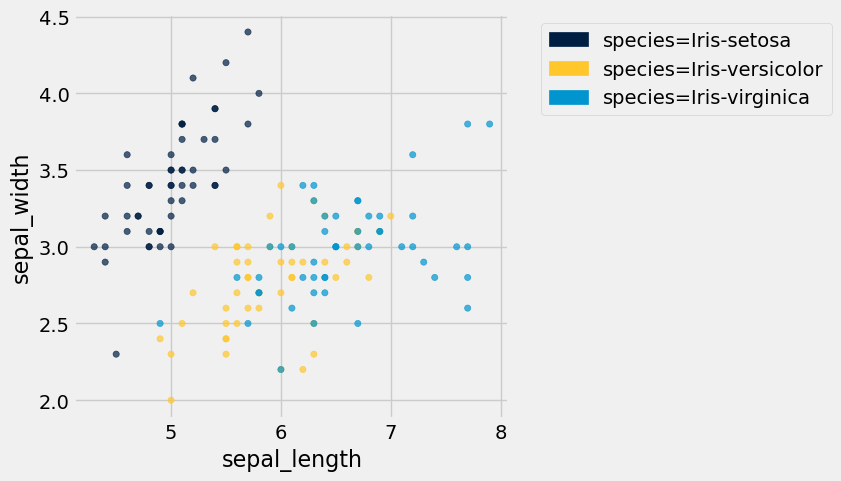

In [17]:
#let's pick two of the column labels above and observe the scatter plot. 
# Note that each of the three species will be a different color on the plot to help us differentiate 
# the iris flower species

iris.scatter("sepal_length" , "sepal_width" , group = 'species')

# Identifying key variables for classification

[{'sepal_length', 'sepal_width'}, {'sepal_length', 'petal_length'}, {'sepal_length', 'petal_width'}, {'sepal_width', 'petal_length'}, {'petal_width', 'sepal_width'}, {'petal_width', 'petal_length'}]


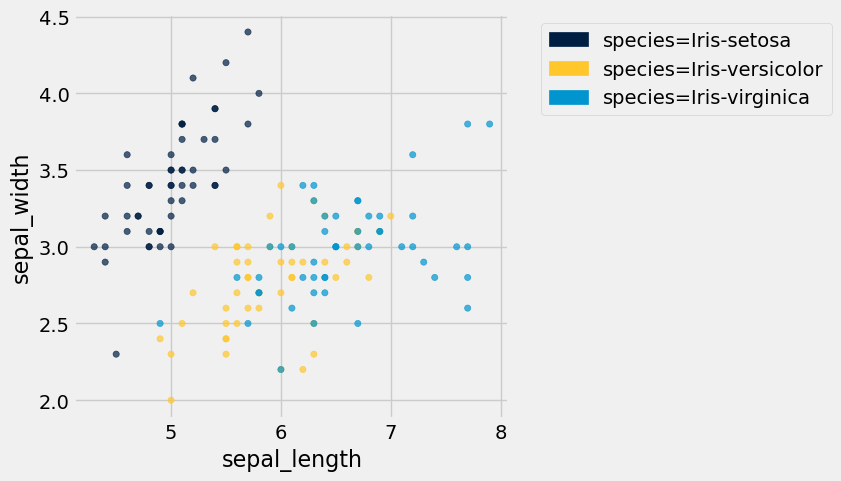

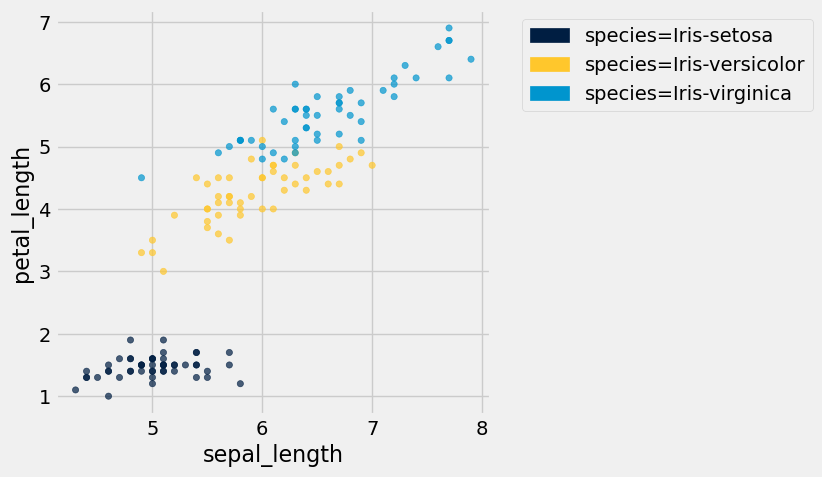

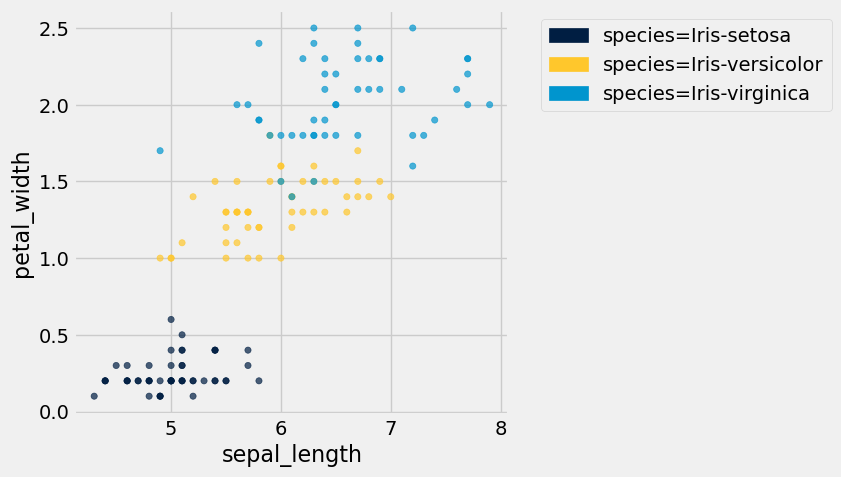

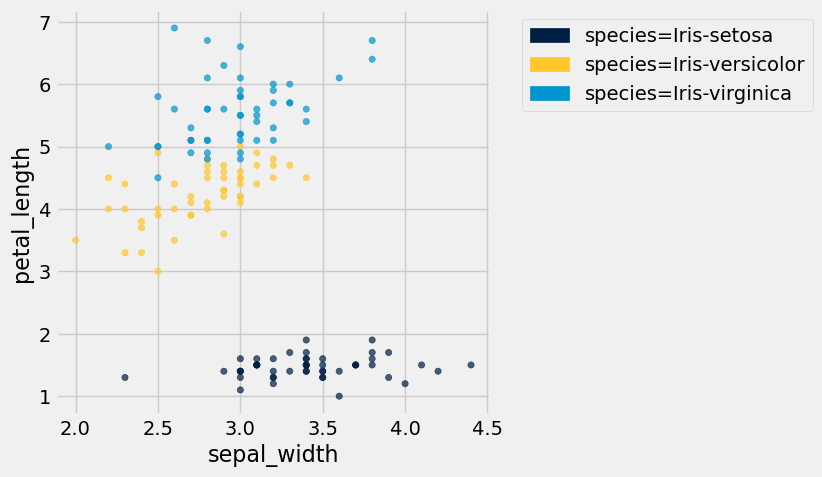

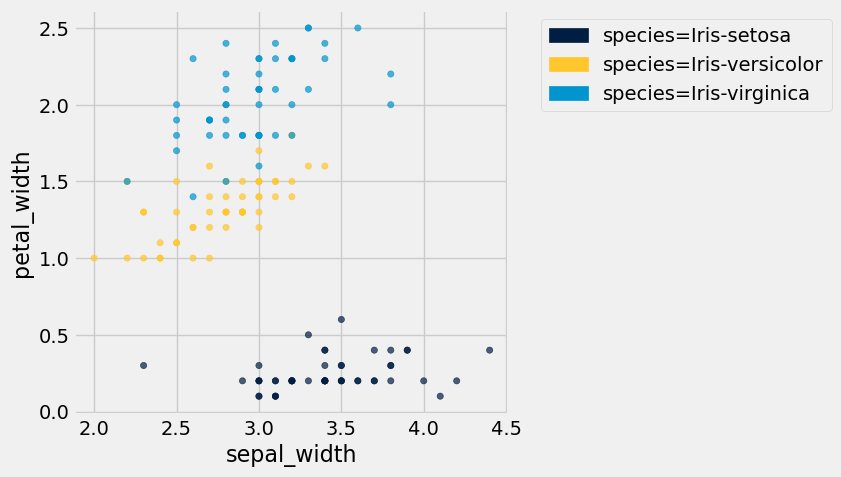

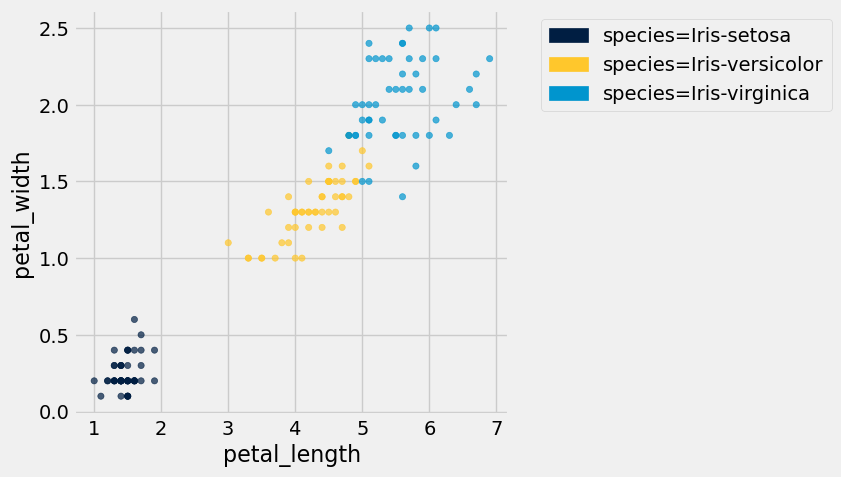

In [18]:
#Now let's look at comparing ALL of the labels to each other in pairwise comparisons
#run the code below 

labels_without_species = list(iris.labels)[:-1]
plotted_pairs = []

for x in labels_without_species:
    for y in labels_without_species:
        
        ordered_pair =  {x,y}
        
        if (x != y) and (ordered_pair not in plotted_pairs):
            iris.scatter(x,y,group='species')
            plotted_pairs.append(ordered_pair)
            
print(plotted_pairs)    

# Creating Training and Testing Data Sets

In [19]:
print('The iris data set has',iris.num_rows,'flowers represented in the sameple')

The iris data set has 150 flowers represented in the sameple


Let's separate 100 rows of data and use it for the training set, and then use the remaining 50 rows of data for the test set. Since the table is organized nicely by species (which is what we are classifying) we want to mix these rows up. We can do this using the `sample` method to shuffle, and then `take` the first 100 rows for training, and the last 50 rows for testing

In [20]:
shuffled_iris = iris.sample(with_replacement = False)

train_iris = shuffled_iris.take(...)
test_iris = shuffled_iris.take(...)

print("Training set:\t",   train_iris.num_rows, "examples")
print("Test set:\t",       test_iris.num_rows, "examples")
train_iris.show(5), test_iris.show(5);

Training set:	 100 examples
Test set:	 50 examples


sepal_length,sepal_width,petal_length,petal_width,species
5.7,2.8,4.1,1.3,Iris-versicolor
5.6,2.7,4.2,1.3,Iris-versicolor
5,2.3,3.3,1,Iris-versicolor
6.2,2.8,4.8,1.8,Iris-virginica
5.4,3.4,1.5,0.4,Iris-setosa


sepal_length,sepal_width,petal_length,petal_width,species
6.8,2.8,4.8,1.4,Iris-versicolor
6,2.7,5.1,1.6,Iris-versicolor
5,3.6,1.4,0.2,Iris-setosa
5.1,3.4,1.5,0.2,Iris-setosa
5.7,3,4.2,1.2,Iris-versicolor


# The Distance Formula

#### The following function below is defined for you homework 12

In [21]:
# row (input): a row from the table 
# features (input): an array of column labels. These labels are the attributes that will help us classify individuals. 
# Note: the attributes must be numerical to help us pass them through the distance function defined above. 

def row_to_array(row, features):
    """Converts a row to an array of its features."""
    arr = make_array()
    for feature in features:
        arr = np.append(arr, row.item(feature))
    return arr

In [22]:
iris_features = iris.drop('species').labels
print(iris_features)
first_setosa = row_to_array(iris.row(0),iris_features)
second_setosa = row_to_array(iris.row(1),iris_features)
last_virginica = row_to_array(iris.row(-1),iris_features)

#calculate the distance between the first setosas and second setosa group
(sum((first_setosa - second_setosa)**2))**(0.5)

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')


0.53851648071345015

Let's convert the above process into a single function:

In [23]:
def distance(array_one,array_two):
    the_distance = ...
    return the_distance

In [24]:
distance(first_setosa,second_setosa)

0.53851648071345015

In [25]:
distance(first_setosa,last_virginica)

4.1400483088968905

In [26]:
distance(second_setosa,last_virginica)

4.1533119314590374

# Let's classify these irises

## Finding the `k` Nearest Neighbors

### Some pre-formatting:

In [27]:
#take the first row from the test set to test your new classifier
row_to_test = test_iris.row(0)
row_to_test

Row(sepal_length=6.7999999999999998, sepal_width=2.7999999999999998, petal_length=4.7999999999999998, petal_width=1.3999999999999999, species='Iris-versicolor')

In [28]:
test_features_array = row_to_array(row_to_test,iris_features)
test_features_array

array([ 6.8,  2.8,  4.8,  1.4])

### Find the distance between the example (i.e. test row) and each example in the training set

In [29]:
#but first we need to train the model and create the classifier

# we will store the distance between the test row with all the rows in the training set. 
distances = make_array()

# we will iterate through the training set row by row.  
for train_row in train_iris.rows:
    #convert the train_row into an array also
    train_row_array = ...
    
    # compute the distance between the test row array and test row array
    distance_to_test_row = ...
    
    # save the distance between these two arrays (test row and train row) into the distances array
    distances = ...
    

distances

Ellipsis

### Augment the training data table with a column containing all the distances

In [31]:
train_with_distances = train_iris.with_column("distances", distances)
train_with_distances

sepal_length,sepal_width,petal_length,petal_width,species,distances
5.7,2.8,4.1,1.3,Iris-versicolor,1.30767
5.6,2.7,4.2,1.3,Iris-versicolor,1.34907
5,2.3,3.3,1,Iris-versicolor,2.42899
6.2,2.8,4.8,1.8,Iris-virginica,0.72111
5.4,3.4,1.5,0.4,Iris-setosa,3.76962
6.3,2.9,5.6,1.8,Iris-virginica,1.02956
4.8,3,1.4,0.1,Iris-setosa,4.15812
5.1,3.7,1.5,0.4,Iris-setosa,3.94842
5.5,2.4,3.8,1.1,Iris-versicolor,1.71464
4.8,3.4,1.6,0.2,Iris-setosa,4.005


### Sort the augmented table in increasing order of the distances

In [32]:
#by default sort orders in ascending order
sorted_training = ...
sorted_training

sepal_length,sepal_width,petal_length,petal_width,species,distances
6.6,2.9,4.6,1.3,Iris-versicolor,0.316228
6.7,3.1,4.7,1.5,Iris-versicolor,0.34641
6.5,2.8,4.6,1.5,Iris-versicolor,0.374166
6.7,3,5,1.7,Iris-versicolor,0.424264
6.6,3,4.4,1.4,Iris-versicolor,0.489898
6.7,3.1,4.4,1.4,Iris-versicolor,0.509902
6.3,2.5,4.9,1.5,Iris-versicolor,0.6
6.4,3.2,4.5,1.5,Iris-versicolor,0.648074
6.3,2.7,4.9,1.8,Iris-virginica,0.655744
6.1,2.9,4.7,1.4,Iris-versicolor,0.714143


### Take the top `k` rows of the sorted table

In [33]:
#choose k = 15
k = ...
top_k_training = ...
top_k_training

sepal_length,sepal_width,petal_length,petal_width,species,distances
6.6,2.9,4.6,1.3,Iris-versicolor,0.316228
6.7,3.1,4.7,1.5,Iris-versicolor,0.34641
6.5,2.8,4.6,1.5,Iris-versicolor,0.374166
6.7,3,5,1.7,Iris-versicolor,0.424264
6.6,3,4.4,1.4,Iris-versicolor,0.489898
6.7,3.1,4.4,1.4,Iris-versicolor,0.509902
6.3,2.5,4.9,1.5,Iris-versicolor,0.6
6.4,3.2,4.5,1.5,Iris-versicolor,0.648074
6.3,2.7,4.9,1.8,Iris-virginica,0.655744
6.1,2.9,4.7,1.4,Iris-versicolor,0.714143


## The Classifier

### Take a majority vote of the `k` nearest neighbors to see which of the two classes appear most often (visually)

In [34]:
row_to_test = test_iris.row(0)

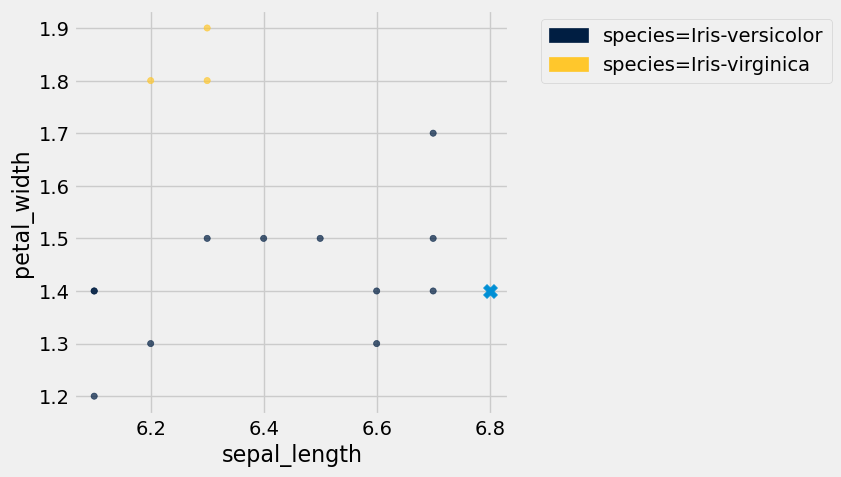

In [35]:
x_axis_label = "sepal_length"
y_axis_label = "petal_width"

top_k_training.scatter(x_axis_label, y_axis_label, group = "species")
plt.scatter(row_to_test.item(x_axis_label), row_to_test.item(y_axis_label), marker = 'X', s = 100)

### Take a majority vote of the `k` nearest neighbors to see which of the two classes appear most often (algorithm)

In [36]:
groups = top_k_training.group("species").sort("count", descending = True)
print(groups)
decision = groups.column("species").item(0)
decision

species         | count
Iris-versicolor | 12
Iris-virginica  | 3


'Iris-versicolor'

# Evaluating your classifier (Accuracy)
What we did for the first row of the `test` table, we must repeat for the rest of the table. 

In [37]:
test_iris

sepal_length,sepal_width,petal_length,petal_width,species
6.8,2.8,4.8,1.4,Iris-versicolor
6,2.7,5.1,1.6,Iris-versicolor
5,3.6,1.4,0.2,Iris-setosa
5.1,3.4,1.5,0.2,Iris-setosa
5.7,3,4.2,1.2,Iris-versicolor
5,3.3,1.4,0.2,Iris-setosa
5.5,2.3,4,1.3,Iris-versicolor
4.9,2.5,4.5,1.7,Iris-virginica
5.8,4,1.2,0.2,Iris-setosa
6.3,2.8,5.1,1.5,Iris-virginica


As daunting as that sounds, a for-loop can sufficiently handle this. We repeat the above steps for each row of the test table: 

In [ ]:
species_column = make_array()

for test_row in test_iris.rows:
    test_row_array = row_to_array(test_row, iris_features)
    distances = make_array()
#######
    for train_row in train_iris.rows:
        #convert the train row into an array also
        train_row_array = row_to_array(train_row, iris_features)
        #compute the distance between the test row array and the train row array
        distance_to_test_row = distance(train_row_array, test_row_array)
        #save the distance between these two arrays (test row and train row) into the distances array
        distances = np.append(distances, distance_to_test_row)
#######
    train_with_distances = train_iris.with_column('distances',distances)
    sorted_training = train_with_distances.sort("distances")
    top_k_training = sorted_training.take(np.arange(k))
    #print(top_k_training)
    species = top_k_training.group("species").sort("count", descending=True).column("species").item(0)
    species_column = np.append(species_column,species)
    
len(species_column) == test_iris.num_rows 

In [ ]:
species_column

In [ ]:
np.count_nonzero(test.column('diagnosis') == diagnoses)/len(diagnoses)

In [ ]:
test.select('diagnosis').with_column('predicted diagnosis',diagnoses)